In [1]:
# import all libraries

# data manipulation
import pandas as pd
import numpy as np
import networkx as nx

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('links.txt',nrows=3000000)

In [3]:
# creating a sample of the first 3m edges
df.to_csv('data/links.csv',header=False,index=False)

In [4]:
g = nx.read_edgelist('data/links.csv', delimiter=' ', create_using=nx.DiGraph(),nodetype=int)

#printing the information of graph
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1119580
Number of edges: 3000000
Average in degree:   2.6796
Average out degree:   2.6796


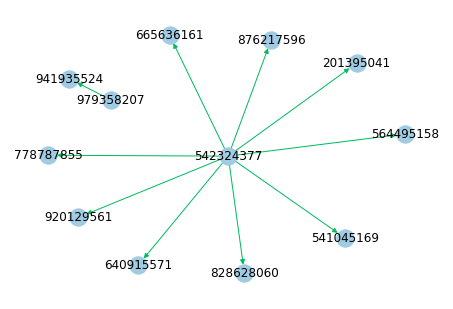

In [29]:
#plotting the graph
df = pd.read_csv('links.txt',skiprows=0, nrows=10).to_csv('data/sample.csv',header=False,index=False)
subgraph = nx.read_edgelist('data/sample.csv', delimiter=' ', create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")

In [ ]:
len(list(nx.simple_cycles(g)))

Text(0,0.5,'No of Followees')

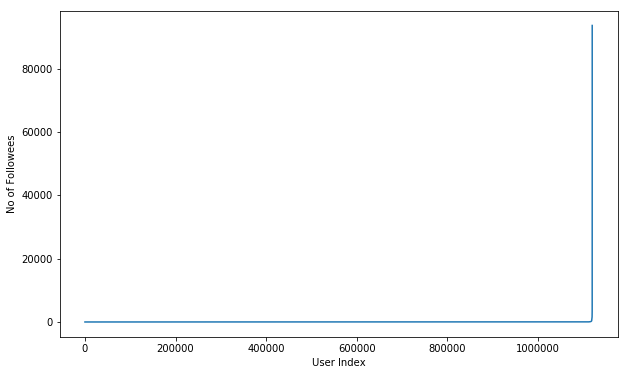

In [30]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(outdegree_dist)
plt.xlabel("User Index")
plt.ylabel("No of Followees")

In [31]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 1.0
99 percentile value is 15.0
100 percentile value is 93703.0
99.1 percentile value is 20.0
99.2 percentile value is 26.0
99.3 percentile value is 36.0
99.4 percentile value is 48.0
99.5 percentile value is 64.0
99.6 percentile value is 88.0
99.7 percentile value is 128.0
99.8 percentile value is 202.0
99.9 percentile value is 434.0
100.0 percentile value is 93703.0


Text(0,0.5,'No of Followers')

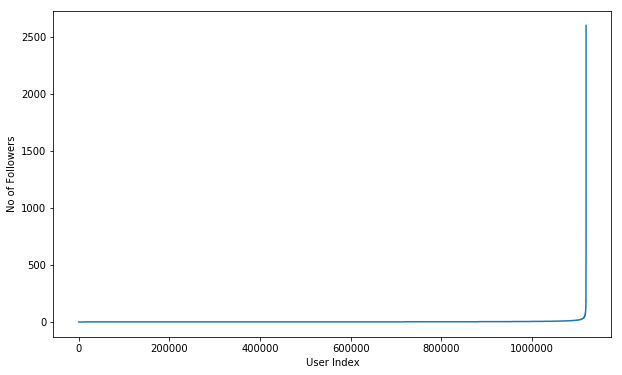

In [32]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(indegree_dist)
plt.xlabel("User Index")
plt.ylabel("No of Followers")

In [33]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

90 percentile value is 5.0
91 percentile value is 5.0
92 percentile value is 6.0
93 percentile value is 6.0
94 percentile value is 7.0
95 percentile value is 8.0
96 percentile value is 9.0
97 percentile value is 11.0
98 percentile value is 15.0
99 percentile value is 23.0
100 percentile value is 2598.0
99.1 percentile value is 25.0
99.2 percentile value is 27.0
99.3 percentile value is 29.0
99.4 percentile value is 32.0
99.5 percentile value is 35.0
99.6 percentile value is 41.0
99.7 percentile value is 48.0
99.8 percentile value is 61.0
99.9 percentile value is 93.0
100.0 percentile value is 2598.0
